In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from curvemetrics.datafetcher import DataFetcher
from curvemetrics.datahandler import DataHandler
from datetime import datetime
import argparse
import asyncio
import os
import json
from web3 import Web3
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
STEP_SIZE = 10 # NOTE: increasing this risks losing txs, 10 is probably safe
INFURA_KEY = os.getenv("INFURA_KEY")
def load_config():
    # Load the configuration
    with open(os.path.join(os.path.abspath('config.json')), "r") as config_file:
        config = json.load(config_file)
    return config

datahandler = DataHandler()
token_metadata = datahandler.get_token_metadata()

datafetcher = DataFetcher(token_metadata=token_metadata)

# start = datetime.timestamp(datetime(2022, 5, 1))
start = 1649264925
end = datetime.timestamp(datetime(2022, 5, 20))

config = load_config()
ust = "0xa693b19d2931d498c5b318df961919bb4aee87a5"
addy = "0x8b6d9085f310396C6E4f0012783E9f850eaa8a82"
# token_data = datafetcher.get_chainlink_prices(ust, addy, start, end)
# df = DataHandler.format_token_data(token_data)
# df.to_csv("./temp_ust_data.csv")
df = pd.read_csv("./temp_ust_data.csv", index_col=0)
df.index = df['timestamp'].apply(datetime.fromtimestamp)
df.head()

,token_id,symbol,timestamp,open,high,low,close,volume
timestamp,,,,,,,,
2022-04-06 17:08:45,0xa693b19d2931d498c5b318df961919bb4aee87a5,UST/USD,1649264925,NaN,NaN,NaN,1.000457,NaN
2022-04-07 17:08:26,0xa693b19d2931d498c5b318df961919bb4aee87a5,UST/USD,1649351306,NaN,NaN,NaN,1.000408,NaN
2022-04-08 17:08:29,0xa693b19d2931d498c5b318df961919bb4aee87a5,UST/USD,1649437709,NaN,NaN,NaN,1.000041,NaN
2022-04-09 17:08:36,0xa693b19d2931d498c5b318df961919bb4aee87a5,UST/USD,1649524116,NaN,NaN,NaN,1.000381,NaN
2022-04-10 17:08:53,0xa693b19d2931d498c5b318df961919bb4aee87a5,UST/USD,1649610533,NaN,NaN,NaN,1.000667,NaN


In [13]:
INFURA_KEY = os.getenv("INFURA_KEY")
chainlink_address = Web3.to_checksum_address(addy)
abi = abi = '[{"inputs":[],"name":"decimals","outputs":[{"internalType":"uint8","name":"","type":"uint8"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"description","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint80","name":"_roundId","type":"uint80"}],"name":"getRoundData","outputs":[{"internalType":"uint80","name":"roundId","type":"uint80"},{"internalType":"int256","name":"answer","type":"int256"},{"internalType":"uint256","name":"startedAt","type":"uint256"},{"internalType":"uint256","name":"updatedAt","type":"uint256"},{"internalType":"uint80","name":"answeredInRound","type":"uint80"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"latestRoundData","outputs":[{"internalType":"uint80","name":"roundId","type":"uint80"},{"internalType":"int256","name":"answer","type":"int256"},{"internalType":"uint256","name":"startedAt","type":"uint256"},{"internalType":"uint256","name":"updatedAt","type":"uint256"},{"internalType":"uint80","name":"answeredInRound","type":"uint80"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"version","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"}]'
client = Web3(Web3.HTTPProvider(f"https://mainnet.infura.io/v3/{INFURA_KEY}"))
contract = client.eth.contract(address=chainlink_address, abi=abi)

In [60]:
1 << 64 | 150

18446744073709551766

In [61]:
contract.functions.getRoundData(18446744073709551766).call()

[18446744073709551766, 100045719, 1649264925, 1649264925, 18446744073709551766]

In [62]:
datetime.fromtimestamp(1649264925)

datetime.datetime(2022, 4, 6, 17, 8, 45)

In [69]:
ohlcv = datahandler.get_ohlcv_data(ust, start, end)
ohlcv.head()

[autoreload of curvemetrics.datafetcher failed: Traceback (most recent call last):
  File "/root/curve-lp-metrics/venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/root/curve-lp-metrics/venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 496, in superreload
    update_generic(old_obj, new_obj)
  File "/root/curve-lp-metrics/venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 393, in update_generic
    update(a, b)
  File "/root/curve-lp-metrics/venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 345, in update_class
    if update_generic(old_obj, new_obj):
  File "/root/curve-lp-metrics/venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 393, in update_generic
    update(a, b)
  File "/root/curve-lp-metrics/venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 305, in update_function
    s

,id,token_id,symbol,timestamp,open,high,low,close,volume
timestamp,,,,,,,,,
2022-04-06 17:10:00,812719,0xa693b19d2931d498c5b318df961919bb4aee87a5,UST/USD,1649265000,1.000,1.001,1.0,1.000,2593.33
2022-04-06 17:11:00,812719,0xa693b19d2931d498c5b318df961919bb4aee87a5,UST/USD,1649265000,1.000,1.001,1.0,1.000,2593.33
2022-04-06 17:12:00,812720,0xa693b19d2931d498c5b318df961919bb4aee87a5,UST/USD,1649265120,1.001,1.001,1.0,1.001,259.15
2022-04-06 17:13:00,812721,0xa693b19d2931d498c5b318df961919bb4aee87a5,UST/USD,1649265180,1.000,1.001,1.0,1.001,3978.21
2022-04-06 17:14:00,812722,0xa693b19d2931d498c5b318df961919bb4aee87a5,UST/USD,1649265240,1.000,1.001,1.0,1.001,10460.10


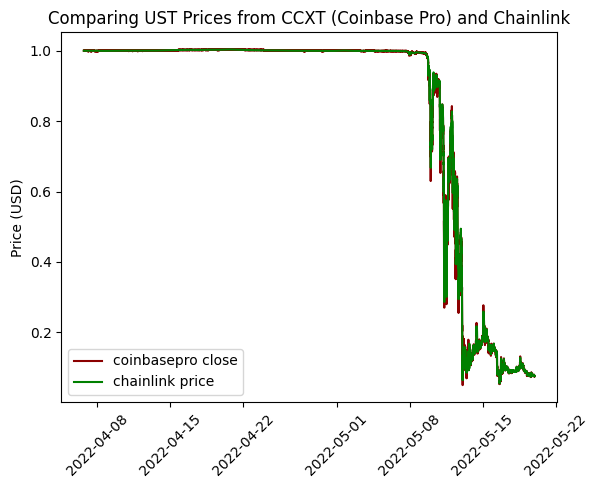

In [85]:
f, ax = plt.subplots()

ax.plot(ohlcv.index, ohlcv["close"], label="coinbasepro close", c='darkred')
ax.plot(df.index, df["close"], label="chainlink price", c='green')
ax.set_ylabel("Price (USD)")
ax.tick_params(axis='x', rotation=45)
ax.legend()
ax.set_title("Comparing UST Prices from CCXT (Coinbase Pro) and Chainlink")
f.savefig('./figs/ust_prices.png')
f.show()

In [54]:
end

1669852800.0

In [56]:
# start = datetime.timestamp(datetime(2022, 11, 1))
start = 1664501879
end = datetime.timestamp(datetime(2023, 2, 1))

config = load_config()
addy = "0x099c9588D8C6F7579C89014e59002881CE0c46A1"
usdn = "0x674C6Ad92Fd080e4004b2312b45f796a192D27a0"

usdn_data = datafetcher.get_chainlink_prices(usdn, addy, start, end)
df = DataHandler.format_token_data(usdn_data)
df.to_csv("./temp_usdn_data.csv")
df.index = df['timestamp'].apply(datetime.fromtimestamp)
df.head()

,token_id,symbol,timestamp,open,high,low,close,volume
timestamp,,,,,,,,
2022-09-30 01:37:59,0x674C6Ad92Fd080e4004b2312b45f796a192D27a0,USDN/USD,1664501879,None,None,None,0.968072,None
2022-10-01 01:22:11,0x674C6Ad92Fd080e4004b2312b45f796a192D27a0,USDN/USD,1664587331,None,None,None,0.970518,None
2022-10-02 01:05:35,0x674C6Ad92Fd080e4004b2312b45f796a192D27a0,USDN/USD,1664672735,None,None,None,0.971518,None
2022-10-03 00:48:59,0x674C6Ad92Fd080e4004b2312b45f796a192D27a0,USDN/USD,1664758139,None,None,None,0.975001,None
2022-10-04 00:32:23,0x674C6Ad92Fd080e4004b2312b45f796a192D27a0,USDN/USD,1664843543,None,None,None,0.973528,None


<Axes: xlabel='timestamp'>

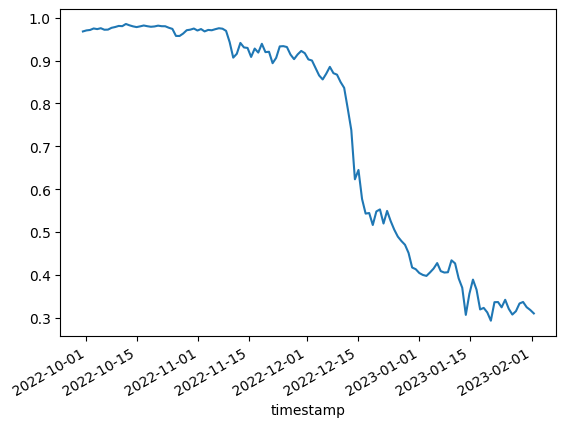

In [57]:
df['close'].plot()

In [32]:
chainlink_address = Web3.to_checksum_address("0x099c9588D8C6F7579C89014e59002881CE0c46A1")
abi = abi = '[{"inputs":[],"name":"decimals","outputs":[{"internalType":"uint8","name":"","type":"uint8"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"description","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint80","name":"_roundId","type":"uint80"}],"name":"getRoundData","outputs":[{"internalType":"uint80","name":"roundId","type":"uint80"},{"internalType":"int256","name":"answer","type":"int256"},{"internalType":"uint256","name":"startedAt","type":"uint256"},{"internalType":"uint256","name":"updatedAt","type":"uint256"},{"internalType":"uint80","name":"answeredInRound","type":"uint80"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"latestRoundData","outputs":[{"internalType":"uint80","name":"roundId","type":"uint80"},{"internalType":"int256","name":"answer","type":"int256"},{"internalType":"uint256","name":"startedAt","type":"uint256"},{"internalType":"uint256","name":"updatedAt","type":"uint256"},{"internalType":"uint80","name":"answeredInRound","type":"uint80"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"version","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"}]'
client = Web3(Web3.HTTPProvider(f"https://mainnet.infura.io/v3/{INFURA_KEY}"))
contract = client.eth.contract(address=chainlink_address, abi=abi)
symbol = contract.functions.description().call().replace(" ", "")

In [34]:
contract.functions.latestRoundData().call()

[512, 28347479, 1675776755, 1675776755, 512]

In [26]:
datetime.fromtimestamp(1675776755)

datetime.datetime(2023, 2, 7, 13, 32, 35)

In [29]:
512 >> 64

0

In [50]:
res = contract.functions.getRoundData(376).call()
print(res)
print(datetime.fromtimestamp(res[3]))

[376, 96807200, 1664501879, 1664501879, 376]
2022-09-30 01:37:59


In [43]:
contract.functions.decimals().call()

8